In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

**References**

OpenAI
- [Fine-Tuning Language Models from Human Preferences](https://arxiv.org/pdf/1909.08593.pdf)
- [Training language models to follow instructions with human feedback](https://arxiv.org/pdf/2203.02155.pdf)

# The need for Aligning Models with Human Intent

Large Language Models (LLM),  although trained only to predict the next token, have shown
great promise for many other tasks
- Zero shot learning

Not surprisingly: the human satisfaction with the performance of these other tasks is not always high
- Further fine-tuning may help
- Requirement for tailored prompts (prompt engineering)

For example, the responses are not always *helpful*

<table>
    <tr>
        <img src="images/InstructGPT_1.png"
    </tr>
    <tr>
        Source: https://openai.com/blog/instruction-following/#moon
    </tr>
</table>


Even a helpful LLM may be problematic

<table>
    <tr>
        <img src="images/InstructGPT_2.png" width=80%>
    </tr>
    <tr>
        Source: https://openai.com/blog/instruction-following/#guide
    </tr>
</table>

Another issue is that training data may contain *toxic* or *biased* concept which are repeated by the LLM.




There are other issues too
- sometimes, a plausible sounding answer is not truthful (*hallucinations*)
- responses may be *toxic* or *biased*
    - because the training data (especially that scraped from the Web) may contain problematic speech


# Approaches to Alignment

The root of these problematic behaviors is that the Loss function on which the LLM was trained
- is to predict the statistically likely next token

Nowhere in this goal is the requirement that it be *aligned* with human preferences and values like being
- helpful
- honest
- harmless: absence of
    - toxicity
    - bias

We would like to find a way to align the LLM model with human intent.

**Footnotes**: 
- A good discussion of Helpful, Honest, Harmless (HHH) can be found [here](https://arxiv.org/pdf/2112.00861.pdf#page=44)
- A benchmark for honesty can be found [here](https://arxiv.org/abs/2109.07958)
    - The performance of several aligned models can be found [here](https://www.alignmentforum.org/posts/yYkrbS5iAwdEQyynW/how-do-new-models-from-openai-deepmind-and-anthropic-perform)

It is hard to precisely define the values that we are trying to achieve.
- human judgment
- contradictory goals
    - censoring responses may reduce helpfulness: responses become evasive


There are a couple of fairly obvious idea for aligning a model with human intent using Supervised Learning
- Loss functions that encoded the intent
- Supervised fine-tuning on datasets that are aligned

Some problems with these idea
- it would be pretty hard to write a mathematical loss function for each concept
    - and even harder to write one that is a consistent combination of many concepts
- the "idealized" training data
    - where does it come from ?
    - likely to be substantially smaller
- the trained model would be less likely
    - to perform as well as an unconstrained model on predicting the next token
    - may not demonstrate Zero short learning

Although there have been attempts at using Supervised Learning for alignment
- this module will discuss the use of Reinforcement Learning

# Reinforcement Learning

*Reinforcement Learning (RL)* describes a way of solving a task by interactively *learning from experience*
- an *agent* (the parameterized model) interacts with an *environment*
    - the environment can be characterized as a collection of attributes: the *state*
    - the agent's actions are chosen according to a *Policy Model*
        - maps current state to the action chosen via parameterized function $\pi_\theta( \actseq_\tt | \stateseq_\tt )$
- to solve a task that requires the model to take a sequence of *actions* (decisions)
- the environment responds to the agent's chosen action by
    - changing the state
    - providing feedback (a *reward*) on the action
- The task for the agent is achieved by trying to maximize the sum of reward received (the *return*)

Think of how a machine might learn how to play a game.

An *episode* (or *trajectory*) is a sequence that records the events as agent
follows its policy in making decisions.

Here is a timeline of an episode
- column labeled "Agent": actions chosen by the Agent
- column labeled "Environment": the responses generated in reaction to the decision

Step  &nbsp; &nbsp;| Agent | Environment | Notes
:---|:---|:---|:---
0 | | $\stateseq_0$    | Environment chooses initial state
  | $\pi(\stateseq_0)$ | $\rewseq_1, \stateseq_1$
1 | $\pi(\stateseq_1)$ | $\rewseq_2, \stateseq_2$
$\vdots$
$\tt$ | $\pi(\stateseq_\tt)$ | $\rewseq_{\tt+1}, \stateseq_{\tt+1}$| Agent follows policy to choose action $\pi(\stateseq_\tt)$
  | | | Environment responds to action by giving reward $\rewseq_{\tt+1}$ and changing state to $\stateseq_{\tt+1}$
$\vdots$


In Reinforcement Learning the agent "learns" by interacting with the environment
- agent follows its current version of the Policy Model
    - the *policy* is a parameterized (by $\theta$) function mapping  states $\stateseq$ to  (a probability distribution) actions
    $$
    \pi_\theta( \actseq | \stateseq )
    $$
- a complete sequence of interactions (e.g., a "game") is called an *episode*
- an episode can be described via the sequence
$$
\stateseq_0, \actseq_0, \rewseq_1, \ldots \stateseq_\tt, \actseq_\tt, \rewseq_{\tt+1}, \ldots
$$
    - in state $\stateseq_\tt$
        - the agent choses action $\actseq_\tt$ by policy policy $\pi_\theta( \actseq_\tt | \stateseq_\tt )$
        - the environment responds by
            - giving reward $\rewseq_{\tt+1}$
            - changing the state to $\actseq_{\tt+1}$
            

Through multiple episodes, an agent "learns" how to improve the return
- by adjusting the Policy Model's parameters/weights
- in the direction that increases return
- creating a sequence of parameters of the policy
$$
\theta_0, \theta_1, \ldots
$$

So a typical RL training looks like repeating the following steps
- agent interacts with environment according to its parameterized Policy Model
- receives rewards
    - either with every action
    - or final reward at end of episode
- agent uses Gradient Ascent with respect to return (or reward)to improve the Policy Model's weights

Here is some [code](external/handson-ml2/18_reinforcement_learning.ipynb#A-simple-hard-coded-policy) from Geron's book
- the game: agent tries to balance a pole
- actions: move base (black box at bottom) right/move left
- reward: if move in direction that keeps pole upright


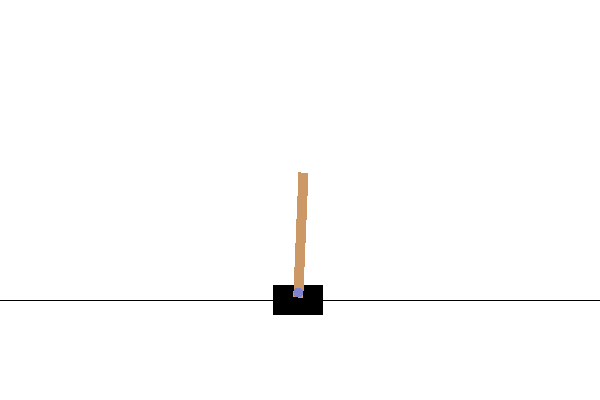

In [2]:
from IPython.display import Image
Image(open('images/cart_pole.gif','rb').read())

Learning from experience mitigates some of the challenges to alignment inherent in Supervised Learning.
- it is sometimes easier to label a response simply as "good/bad" than to give a mathematical "reason"
- higher reward for a good response than for a bad
- the reward may be deferred into the future, rather than received at each step
    - feedback (used to updated parameters) not necessarily an *immediate* result of action
    - the Helpful/Harmless/Honest metric is a property of the *entire sequence* rather than the next token
- both the agent and environment may be stochastic
    - LM samples from classifier output probability distribution $\pr{ \y | \x }$

The *fundamental differences compared to Supervised Learning*
- A training example (episode) is created *interactively* (on-line)
- the episode is *affected* by the agent's chosen action at each step of the episode.
    - both the agent and environment need not be deterministic
    - different responses given the same state
        - e.g., a poker-playing environment may choose to "bluff"
- there may be value to the agent choosing an action
    - other than that believed to be "best" at an intermediate (incomplete) point in the training
    - in order to *explore* (learn about the environment's responses)
        - environment as an adversary

# Reinforcement Learning with Human Feedback (RLHF)

Suppose we have a model (the Policy Model) that generates responses to prompts.

An idealized workflow for Alignment interjects a human in the training as follows
- A prompt is chosen from training data
- The prompt is fed to the agent/Policy Model  in order to generate a response
    - the prompt is sometimes called the *context*
- Human evaluates the desirability of the response
- Agent modifies its parameters based on the human's feedback

This describes *Reinforcement Learning with Human Feedback*.

<table>
    <center><strong>Reinforcement Learning with Human Feedback</strong></center>
    <img src="images/instructgpt_rlhf.png" width=80%>
<br>
Attribution: https://arxiv.org/pdf/2203.02155.pdf#page=3
</table>

This idealized workflow is impractical.

Humans in the loop !
- Makes training very slow
- Humans may not be able to provide precise numerical values of quality for many tasks

The solution is to create a *Reward Model*
- a Neural Network that replaces the Human in the Loop
- Trained to predict the reward that a human would have given

# Removing humans from the loop: Reward Model (RM)/Preference Model (PM)

We replace the human with a neural network called the *Reward Model*
- given a response: the model outputs a reward (really a return for an episode)
- sometimes called the *Preference Model*
- often outputs an ELO-like score

## Generating training examples for the Reward Model

In order to train the Reward model, we need training examples.

The *features* of a training example consists of 
- a prompt to the LLM to cause it to generate output
- the output of the LLM
    - sampled *several* times

The *label* is an ordered ranking of the outputs.
- Converted to an  ELO score

An interface for the human simplifies creation of training examples
- a prompt
- 2 or more alternative responses to the prompt
    - generated by the same Policy Model (remember: there is a probability distribution with each token generated)
    - generated by different Policy Models 
- the human labeler ranks the alternative outputs
- multiple labelers per prompt is useful

The ranks can be turned into a numeric ELO-like score as we describe below.
A

Here is an example of an interface to simplify example creation:
- left side: examples for making the model Helpful
- right side: examples for making the model Harmless

<img src="images/anthropic_labeler_1.png" width=75%>

The human labels are crowd-workers (Upwork, Scale AI, MTurk) with various requirements and guidance
- Low guidance [Anthropic](https://arxiv.org/pdf/2204.05862.pdf)
    - raters are given basic instructions only for determining: toxicity, truthfulness, etc.
- Highly guidance: used by [OpenAI](https://github.com/openai/following-instructions-human-feedback#contents)
    - [Labeling instructions](https://docs.google.com/document/d/1MJCqDNjzD04UbcnVZ-LmeXJ04-TKEICDAepXyMCBUb8/edit#)
    - [Toxicity labeling instructions](https://docs.google.com/document/d/1d3n6AqNrd-SJEKm_etEo3rUwXxKG4evCbzfWExvcGxg/edit)
(https://docs.google.com/document/d/1MJCqDNjzD04UbcnVZ-LmeXJ04-TKEICDAepXyMCBUb8/edit#)

Raters are interviewed and periodically evaluated for the quality of their output.

In some [cases](https://www.anthropic.com/red_teaming.pdf) humans are instructed to
"trick" the model into producing harmful responses in order to generated training data.


### Ranking: Avoiding precise numerical values

Why are humans asked to rank multiple responses rather than being asked to provide a "quality" score
for a single response ?

Asking a human (the *labeler*) to provide an exact numeric quality metric (say: 0-100%) to a response raises issues
- How do you numerically quantify "a little better": 1% ? 5% ?
- Different people may use different scales
    - "Adequate": 51% or 75%
- You are liable to get inconsistent/contradictory responses

But asking a human to *rank* two responses
- avoids false precision
- increases odds of agreement between two human judges
- especially when the two choices are not close

Thus, rankings are a better match than absolute scores for a human.


The rankings can be turned into a numeric *ELO score*
- the system used to express the strength of Chess players
- absolute level of score is meaningless; only difference between two scores matters
- pairwise competition:
    - rating points transfered from loser to winner
- based on the "win percent" of each pair of alternatives
    - fraction of raters who prefer the first alternative to the second
    - strength of an alternative assumed to follow some distribution (e.g., normal)
        - with a mean varying by strength
        - identical standard deviation across alternatives
    - can derive a confidence interval for two alternatives being truly different
        - e.g. can derive standard deviation of difference in means
- The *difference* in rating implies a probability of the stronger alternative winning
   
- [see here](https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details) for details

### Some natural sources of ranked outputs

In order to train a model  we need humans to rank multiple outputs.

For some tasks (e.g., training a model to be Helpful)
- we may not need to hire labelers
- there may be a natural source for training examples (features: multiple outputs, label: ranked outputs)
    - Question and Answer websites where viewers provide feedback ("up-voting")
        - StackExchange, Reddit
    


## Reward model: training

- A prompt (context) is fed to the both a human (offline) and the model
- The model creates model responses (continuation)
- The Reward Model and the Human both rank the responses (calculate a reward)
- The Loss function penalizes the model for model rewards that deviate from the human reward


<table>
    <tr>
        <img src="images/instructgpt_reward.png" width=75%>
    </tr> 
    <br>
     <tr> 
         <center>context = prompt; continuation = response</center>
    </tr>
    <br><br>
    <tr>
    Source: https://arxiv.org/pdf/1909.08593.pdf#page=2
    </tr>
   
</table>    

## Reward model: discussion

In order to mitigate the quantity of human-labeled examples
- the authors investigate the Pre-Training + Fine-Tuning paradigm for the reward model
- they call this [Preference Model Pretraining (PMP)](https://arxiv.org/pdf/2112.00861.pdf#page=20)
- followed by Preference Model Fine-Tuning

The idea is to adapt the LLM to follow preferences (similar to adapting it to following Instructions)
- Further train the LLM on a Preference Model task
    - using a large number of examples from *pre-defined preference* tasks
- *Transfer* to the narrow preference task by Fine Tuning on a small, task-specific training set

So the workflow becomes
- Large Language Model Pre-Training
- Preference Model Pre-Training
- Preference Model Fine-Tuning

Where does the *large* Preference Pre-Training dataset come from ?

There are natural sources of examples (features: list of texts; labels: ranking of each text in list)
for generic preference training
- Question and Answer websites where readers can "up-vote" an answer
    - StackExchange, Reddit
    
Once pre-trained on the generic preference task, further fine-tuning can adapt it to the specific
preference task.

# Instruct GPT: GPT fine-tuned with RLHF

[paper](https://arxiv.org/pdf/2203.02155.pdf)

[InstructGPT](https://openai.com/blog/instruction-following)
- Fine-tuned from GPT-2 to be more helpful (follow instructions)
- Predecessor of ChatGPT

<table>
    <tr>
        <img src="images/instruct_gpt_process.png" width=75%>
    </tr>      
    <tr>
    Source: https://openai.com/blog/instruction-following/#methods
    </tr>
</table>    

## Step 1: Fine-tune GPT to follow instructions
- human generates a desired response
- Supervised Learning

## Step 2: Reward model training

## Step 3: RLHF


There are various algorithms for updating the sequence (improving the Policy Model).

InstructGPT uses [*Proximal Policy Optimization (PPO)*](https://arxiv.org/pdf/1707.06347.pdf).

A notable feature of PPO is that it restricts how rapidly the policy can change.

Given an episode 
$$
\stateseq_0, \actseq_0, \rewseq_1, \ldots \stateseq_\tt, \actseq_\tt, \rewseq_{\tt+1}, \ldots
$$
PPO constrains parameters updates
- bound the KL Divergence between the old and new probability distributions of each state
$$
\KL \left( \pi_{\theta_{k}}( \actseq_\tt | \stateseq_\tt) \|\pi_{\theta_{k+1}}( \actseq_\tt | \stateseq_\tt) \right) = \log \frac{\pi_{\theta_{k}}( \actseq_\tt | \stateseq_\tt)}{\pi_{\theta_{k+1}}( \actseq_\tt | \stateseq_\tt)}  < \delta
$$
    - recall 
- and/or clip the *probability ratio*
$$
r_\tt(\theta) = \frac{\pi_{\theta_{k+1}}( \actseq_\tt | \stateseq_\tt)}{\pi_{\theta_{k}}( \actseq_\tt | \stateseq_\tt)} 
$$
to be in the range 
$$
r_\tt(\theta) \in [ 1 -\epsilon, 1 + \epsilon ]
$$

In [3]:
print("Done")

Done
